**Importation des modules nécéssaire et lecture du fichier csv des étudiants en maths**

In [ ]:
# Importation des modules 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import altair as alt
from vega_datasets import data
import seaborn as sns

# Lecture du fichier CSV student-mat
df_math = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student-mat.csv')
df_math


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_math["GS"] = df_math[["G1", "G2", "G3"]].mean(axis=1)
df_por["GS"] = df_por[["G1", "G2", "G3"]].mean(axis=1)

df_math["Talc"] = df_math[["Dalc", "Walc"]].mean(axis=1)
df_por["Talc"] = df_por[["Dalc", "Walc"]].mean(axis=1)

**Affichage des données en fonction de l'age, de la consommation d'alcool en semaine et fin de semaine, des notes trimestriels, et de la santé, des étudiants en maths**

In [ ]:
# affichage des donnés groupé par le sexe et l'âge pour les étudiants en maths
display(df_math[["school","sex","age","Talc","health","GS","failures"]].groupby(["sex","age"]).agg(["min",'mean',"max"]).style.background_gradient(cmap="Wistia"))

**Lecture du fichier csv des étudiants de la langue portugaise**


In [ ]:
df_por = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student-por.csv')
df_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


**Affichage des données en fonction de l'age, de la consommation d'alcool en semaine et fin de semaine, des notes trimestriels, et de la santé, des étudiants de la langues portugaise**

In [ ]:
# affichage des donnés groupé par le sexe et l'âge pour les étudiants en portugais
display(df_por[["school","sex","age","Talc","health","GS","failures"]].groupby(["sex","age"]).agg(["min",'mean',"max"]).style.background_gradient(cmap="Wistia"))

**Graphs des données comparatives des étudiants en maths**

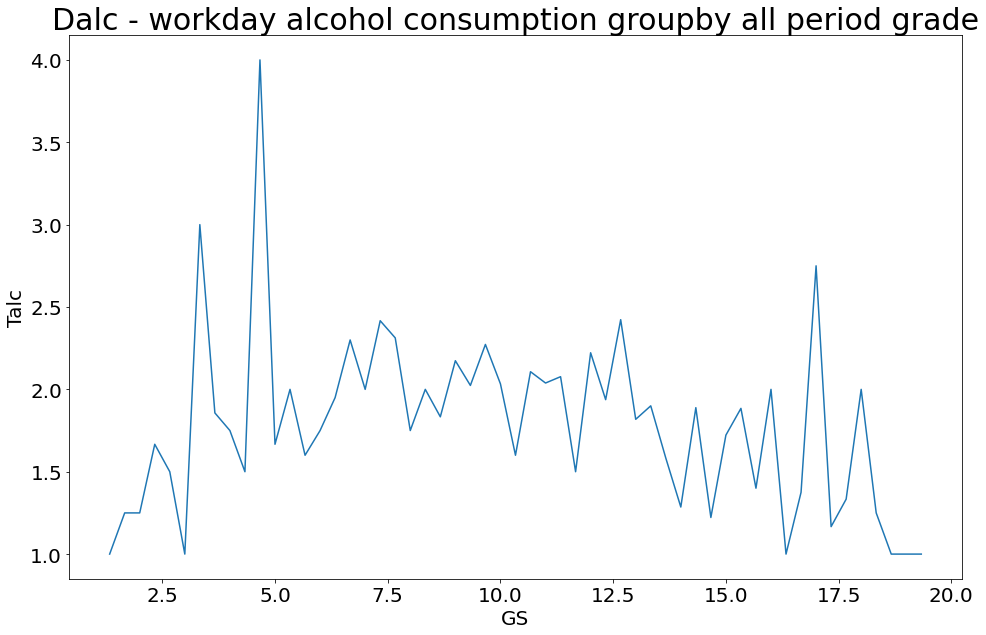

In [ ]:

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = df_math.groupby('GS').mean()['Talc']
dfg.plot(kind='line', title='Dalc - workday alcohol consumption groupby all period grade', fontsize=20, )

plt.ylabel('Talc')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

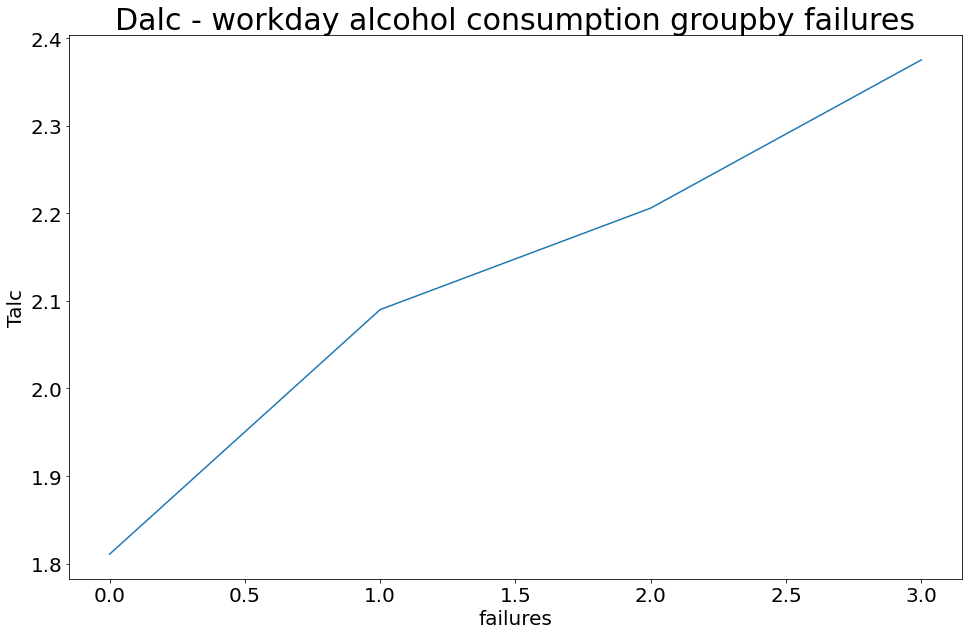

In [ ]:

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = df_math.groupby('failures').mean()['Talc']
dfg.plot(kind='line', title='Dalc - workday alcohol consumption groupby failures', fontsize=20)

plt.ylabel('Talc')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

**Graphs des données comparatives des étudiants de la langue portugaise**

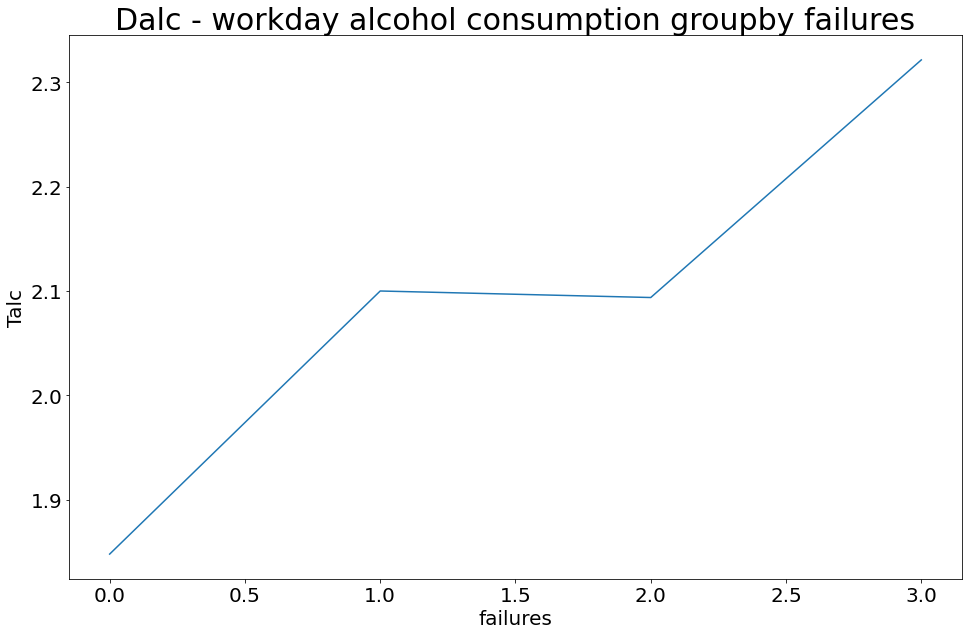

In [ ]:

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = df_por.groupby('failures').mean()['Talc']
dfg.plot(kind='line', title='Dalc - workday alcohol consumption groupby failures', fontsize=20)

plt.ylabel('Talc')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

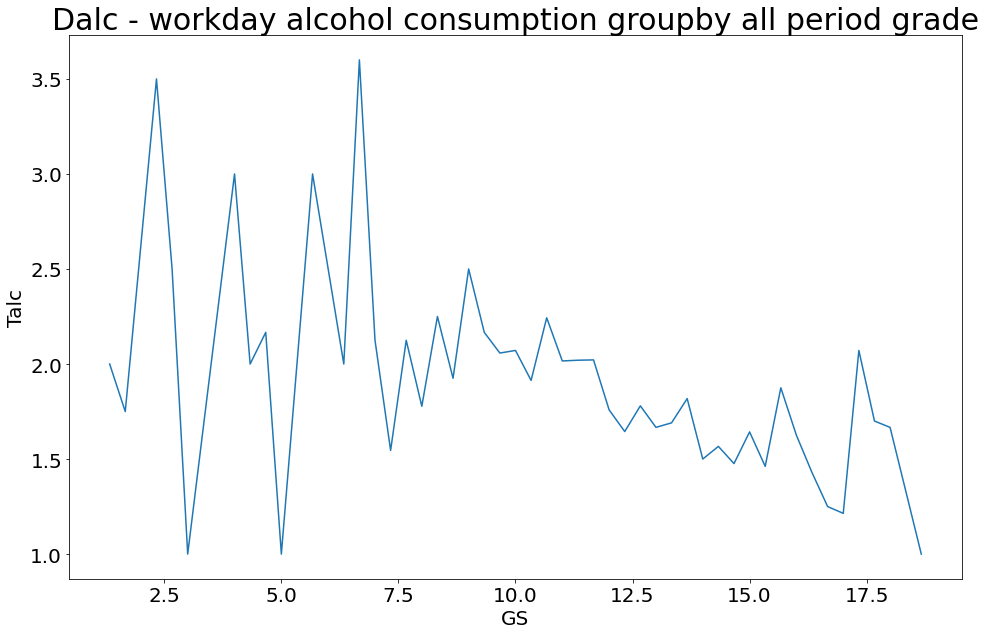

In [ ]:

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = df_por.groupby('GS').mean()['Talc']
dfg.plot(kind='line', title='Dalc - workday alcohol consumption groupby all period grade', fontsize=20)

plt.ylabel('Talc')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

**Graphs nuage de points de la consomation d'alcool dans la semaine et pendant le week-end en fonction de l'age des étudiants en maths**

In [ ]:
alt.Chart(df_math).mark_circle(size=60).encode(
    x='age',
    y='Talc',
    tooltip=['GS', 'health',]
).interactive()

alt.Chart(...)

**Graphs nuage de points de la consomation d'alcool dans la semaine et pendant le week-end en fonction de l'age des étudiants de la langue portugaise**

In [ ]:
alt.Chart(df_por).mark_circle(size=60).encode(
    x='age',
    y='Talc',
    tooltip=['GS', 'health',]
).interactive()

alt.Chart(...)

**Consommation d'aclool par rapport a l'age des étudiant en maths (Histogramme)**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


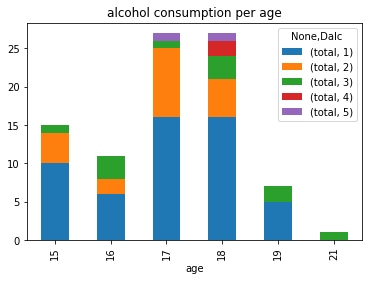

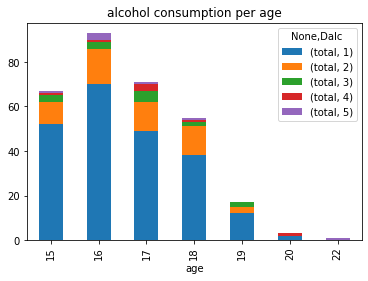

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student-mat.csv')
r_data = data[data['address'] == 'R']
u_data = data[data['address'] == 'U']

r_df = r_data[['age', 'Dalc']]
r_df['total'] = 1
r_df = r_df.groupby(['age', 'Dalc']).sum().reset_index()
pd.pivot_table(r_df, index=['age'], columns=['Dalc'], values=['total']).fillna(0).plot(kind='bar', stacked=True,
title="alcohol consumption per age")


u_df = u_data[['age', 'Dalc']]
u_df['total'] = 1
u_df = u_df.groupby(['age', 'Dalc']).sum().reset_index()
pd.pivot_table(u_df, index=['age'], columns=['Dalc'], values=['total']).fillna(0).plot(kind='bar', stacked=True,
title="alcohol consumption per age")


**Consommation d'aclool par rapport a l'age des étudiant de la langue portugaise (Histogramme)**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


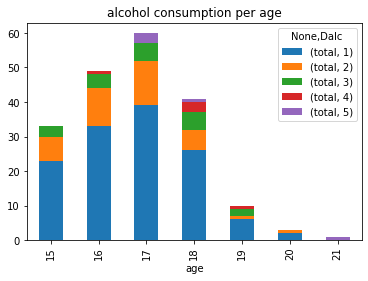

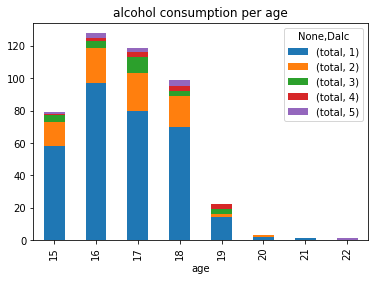

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student-por.csv')
r_data = data[data['address'] == 'R']
u_data = data[data['address'] == 'U']

r_df = r_data[['age', 'Dalc']]
r_df['total'] = 1
r_df = r_df.groupby(['age', 'Dalc']).sum().reset_index()
pd.pivot_table(r_df, index=['age'], columns=['Dalc'], values=['total']).fillna(0).plot(kind='bar', stacked=True,
title="alcohol consumption per age")


u_df = u_data[['age', 'Dalc']]
u_df['total'] = 1
u_df = u_df.groupby(['age', 'Dalc']).sum().reset_index()
pd.pivot_table(u_df, index=['age'], columns=['Dalc'], values=['total']).fillna(0).plot(kind='bar', stacked=True,
title="alcohol consumption per age")


**Comsommation d'alcool par rapport à l'age et l'adresse des étudiants en maths**

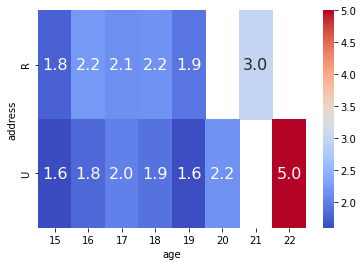

In [ ]:
heatmap = pd.pivot_table(df_math, values='Talc', 
                     index=['address'], 
                     columns='age')
p = sns.heatmap(heatmap, cmap='coolwarm', annot=True, fmt=".1f", annot_kws={'size':16})

**Comsommation d'alcool par rapport à l'age et l'adresse des étudiants de la langue portugaise**

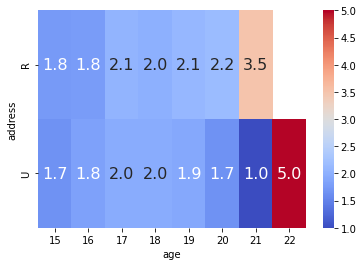

In [ ]:
heatmap = pd.pivot_table(df_por, values='Talc', 
                     index=['address'], 
                     columns='age')
p = sns.heatmap(heatmap, cmap='coolwarm', annot=True, fmt=".1f", annot_kws={'size':16})

**Comsommation d'alcool par rapport à l'age et au temps libre des étudiants en maths**

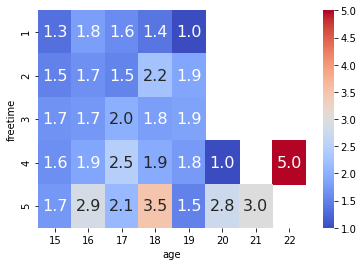

In [ ]:
heatmap = pd.pivot_table(df_math, values='Talc', 
                     index=['freetime'], 
                     columns='age')
p = sns.heatmap(heatmap, cmap='coolwarm', annot=True, fmt=".1f", annot_kws={'size':16})

**Comsommation d'alcool par rapport à l'age et au temps libre des étudiants de la langue portugais**

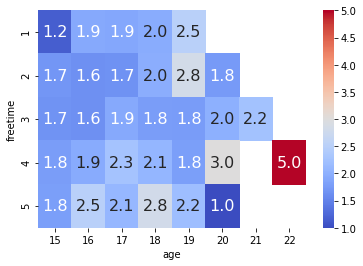

In [ ]:
heatmap = pd.pivot_table(df_por, values='Talc', 
                     index=['freetime'], 
                     columns='age')
p = sns.heatmap(heatmap, cmap='coolwarm', annot=True, fmt=".1f", annot_kws={'size':16})